In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv(r'C:\Users\LENOVO\Downloads\Churn_Modelling.csv')

In [10]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Cleansing data**



In [11]:
df = df.drop(["RowNumber", "CustomerId", "Surname","HasCrCard","Gender","Age"], axis=1)


In [12]:
df.isnull().sum()

CreditScore        0
Geography          0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.shape

(10000, 8)

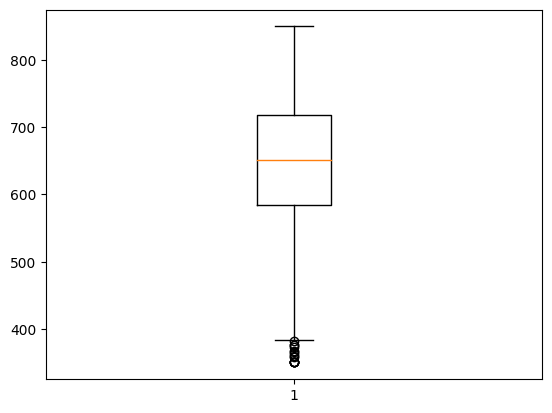

In [14]:
list=df['CreditScore'].values

plt.boxplot(list)
plt.show()


In [15]:
threshold=-3
data=df['CreditScore'].values
outliers=[]
mean=np.mean(data)
std=np.std(data)
for i in data:
  zscore=(i-mean)/std
  if zscore < threshold:
    outliers.append(i)
print(outliers)

[359, 350, 350, 358, 351, 350, 350, 350]


In [16]:
df.head(10)

,CreditScore,Geography,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,2,0.00,1,1,101348.88,1
1,608,Spain,1,83807.86,1,1,112542.58,0
2,502,France,8,159660.80,3,0,113931.57,1
3,699,France,1,0.00,2,0,93826.63,0
4,850,Spain,2,125510.82,1,1,79084.10,0
5,645,Spain,8,113755.78,2,0,149756.71,1
6,822,France,7,0.00,2,1,10062.80,0
7,376,Germany,4,115046.74,4,0,119346.88,1
8,501,France,4,142051.07,2,1,74940.50,0
9,684,France,2,134603.88,1,1,71725.73,0


**Analysing the dataset**

<Axes: xlabel='Geography', ylabel='count'>

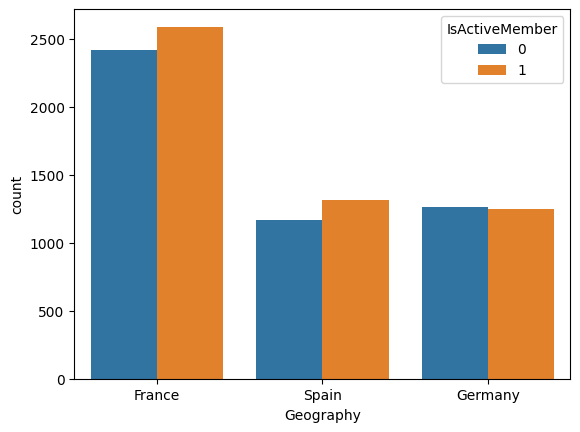

In [17]:
sns.countplot(x="Geography",hue="IsActiveMember",data=df)

<Axes: xlabel='Geography', ylabel='count'>

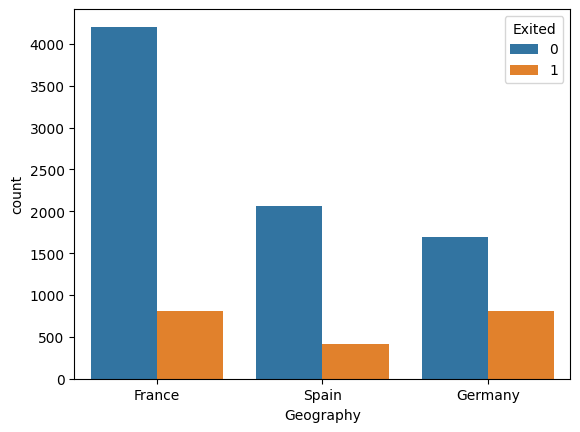

In [18]:
sns.countplot(x="Geography",hue="Exited",data=df)

<Axes: xlabel='Geography', ylabel='count'>

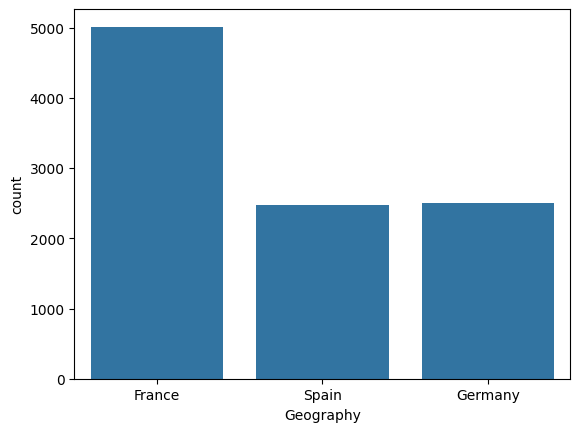

In [19]:
sns.countplot(x="Geography",data=df)

In [20]:
df

,CreditScore,Geography,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,2,0.00,1,1,101348.88,1
1,608,Spain,1,83807.86,1,1,112542.58,0
2,502,France,8,159660.80,3,0,113931.57,1
3,699,France,1,0.00,2,0,93826.63,0
4,850,Spain,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,France,5,0.00,2,0,96270.64,0
9996,516,France,10,57369.61,1,1,101699.77,0
9997,709,France,7,0.00,1,1,42085.58,1
9998,772,Germany,3,75075.31,2,0,92888.52,1


<Axes: xlabel='NumOfProducts', ylabel='count'>

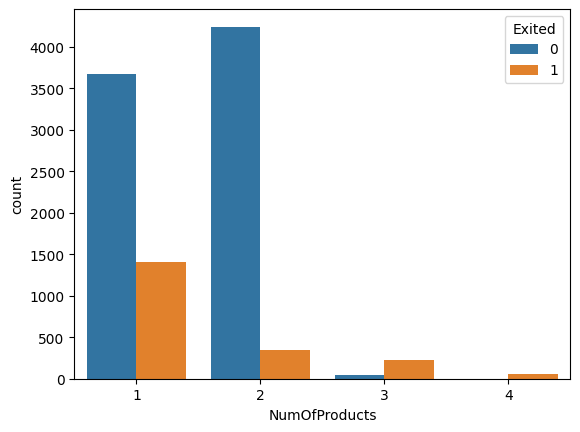

In [21]:
sns.countplot(x="NumOfProducts",hue="Exited",data=df)

In [22]:
#sns.countplot(x="Age",hue="Exited",data=df)

In [23]:
geo = pd.get_dummies(df['Geography'],drop_first=True)

In [24]:
df=pd.concat([df,geo],axis=1)
df

,CreditScore,Geography,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,2,0.00,1,1,101348.88,1,False,False
1,608,Spain,1,83807.86,1,1,112542.58,0,False,True
2,502,France,8,159660.80,3,0,113931.57,1,False,False
3,699,France,1,0.00,2,0,93826.63,0,False,False
4,850,Spain,2,125510.82,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,5,0.00,2,0,96270.64,0,False,False
9996,516,France,10,57369.61,1,1,101699.77,0,False,False
9997,709,France,7,0.00,1,1,42085.58,1,False,False
9998,772,Germany,3,75075.31,2,0,92888.52,1,True,False


In [25]:
df=df.drop("Geography",axis=1)

In [26]:
x=df.drop("Exited",axis=1)
y=df['Exited']

In [27]:
df


,CreditScore,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,2,0.00,1,1,101348.88,1,False,False
1,608,1,83807.86,1,1,112542.58,0,False,True
2,502,8,159660.80,3,0,113931.57,1,False,False
3,699,1,0.00,2,0,93826.63,0,False,False
4,850,2,125510.82,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,2,0,96270.64,0,False,False
9996,516,10,57369.61,1,1,101699.77,0,False,False
9997,709,7,0.00,1,1,42085.58,1,False,False
9998,772,3,75075.31,2,0,92888.52,1,True,False


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred=lr.predict(x_test)

In [32]:
accuracy_score(y_test,pred)

0.7984

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
model = LogisticRegression(penalty='l2', C=1.0)
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test_scaled)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.804


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
clf = DecisionTreeClassifier(random_state=42)

In [44]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred = clf.predict(x_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7695


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains your target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.826


In [48]:
import pickle

In [49]:
filename= ('trained_model.sav')
pickle.dump(clf,open(filename,'wb'))

In [50]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [51]:
input_data=(608,1,83807.86,1,1,112542.58,False,True)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The user has not exited")
else:
  print("The user has exited")

[0]
The user has not exited


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
